In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

### Preparing our dataset

In [169]:
fma_rock_vs_hiphop = pd.read_csv('fma-rock-vs-hiphop.csv')

In [170]:
fma_rock_vs_hiphop

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17729,155063,320000,0,NaN,2017-03-24 19:40:43,NaN,283,3,Hip-Hop,"[21, 811]",...,NaN,1283,NaN,Attribution,1050,NaN,4,NaN,"['old school beats', '2017 free instrumentals'...",Been On
17730,155064,320000,0,NaN,2017-03-24 19:40:44,NaN,250,2,Hip-Hop,"[21, 811]",...,NaN,1077,NaN,Attribution,858,NaN,2,NaN,"['old school beats', '2017 free instrumentals'...",Send Me
17731,155065,320000,0,NaN,2017-03-24 19:40:45,NaN,219,3,Hip-Hop,"[21, 811]",...,NaN,1340,NaN,Attribution,1142,NaN,1,NaN,"['old school beats', '2017 free instrumentals'...",The Question
17732,155066,320000,0,NaN,2017-03-24 19:40:47,NaN,252,6,Hip-Hop,"[21, 811]",...,NaN,2065,NaN,Attribution,1474,NaN,3,NaN,"['old school beats', '2017 free instrumentals'...",Roy


In [171]:
echonest_metrics = pd.read_json('echonest-metrics.json',precise_float=True)

In [172]:
echonest_metrics

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274


In [173]:
echo_tracks = echonest_metrics.merge(fma_rock_vs_hiphop[['track_id','genre_top']],on='track_id')

In [174]:
echo_tracks

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018,Rock
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,Hip-Hop


In [175]:
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 375.3+ KB


### Pairwise relationships between continuous variables


In [176]:
echo_tracks_continuous = echo_tracks.drop('genre_top',axis=1)

In [177]:
echo_tracks_continuous.corr()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


### Splitting our data


In [178]:
y = echo_tracks['genre_top']
X = echo_tracks.drop(['genre_top','track_id'],axis=1)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Normalizing the feature data

In [180]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Principal Component Analysis on our scaled data


In [181]:
pca = PCA()
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.33351203, 0.24732271, 0.14677325, 0.10789368, 0.05014906,
       0.04582989, 0.04035424, 0.02816514])

### Further visualization of PCA

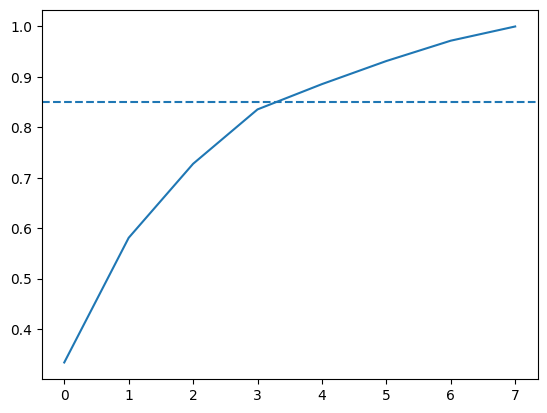

In [182]:
cum_exp_variance = np.cumsum(explained_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

### Projecting on to our features

In [183]:
pca = PCA(n_components=6)

train_pca = pca.fit_transform(X_train)

# Fit and transform the scaled test features using pca
test_pca = pca.transform(X_test)

### Train a decision tree to classify genre


In [184]:
DecTree = DecisionTreeClassifier()

DecTree.fit(train_pca,y_train)

DecisionTreeClassifier()

In [185]:
y_pred = DecTree.predict(test_pca)
print(y_pred)

['Rock' 'Hip-Hop' 'Hip-Hop' ... 'Rock' 'Hip-Hop' 'Hip-Hop']


### Compare our decision tree to a logistic regression


In [186]:
LogisticReg = LogisticRegression()
LogisticReg.fit(train_pca,y_train)
y_pred_LogReg = LogisticReg.predict(test_pca)
print(y_pred_LogReg)

['Rock' 'Rock' 'Hip-Hop' ... 'Rock' 'Hip-Hop' 'Rock']


In [187]:
classification_DecTree = classification_report(y_test,y_pred)
classification_LogReg = classification_report(y_test,y_pred_LogReg)

print('Decision Tree: \n', classification_DecTree)
print('Logistic Regression: \n', classification_LogReg)


Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.60      0.62      0.61       272
        Rock       0.91      0.90      0.91      1169

    accuracy                           0.85      1441
   macro avg       0.75      0.76      0.76      1441
weighted avg       0.85      0.85      0.85      1441

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.72      0.56      0.63       272
        Rock       0.90      0.95      0.93      1169

    accuracy                           0.88      1441
   macro avg       0.81      0.76      0.78      1441
weighted avg       0.87      0.88      0.87      1441



### Balance our data for greater performance


In [188]:
hop_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop']
rock_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Rock']

In [189]:
rock_only = rock_only.sample(hop_only.shape[0], random_state=10)

In [190]:
rock_hop_bal = pd.concat([rock_only, hop_only])

rock_hop_bal

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
773,4038,0.825838,0.263645,0.797948,8.423181e-01,0.177089,0.045277,166.580,0.713586,Rock
2273,19501,0.966635,0.386114,0.651980,8.694723e-01,0.353138,0.032208,130.767,0.712374,Rock
2846,31252,0.721510,0.358035,0.948187,8.011837e-01,0.105706,0.095522,125.884,0.208728,Rock
2147,17947,0.617370,0.487321,0.918848,8.170503e-01,0.089908,0.040337,129.565,0.268893,Rock
2654,27421,0.025464,0.245523,0.422381,9.380106e-01,0.441009,0.038795,149.960,0.439876,Rock
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,Hip-Hop


In [191]:
y = rock_hop_bal['genre_top']
X = rock_hop_bal.drop(['track_id','genre_top'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

train_pca = pca.fit_transform(X_train)
test_pca = pca.transform(X_test)

### Does balancing our dataset improve model bias?


In [192]:
DecTree.fit(train_pca,y_train)
pred_labels_tree = DecTree.predict(test_pca)

LogisticReg.fit(train_pca,y_train)
pred_labels_logit = LogisticReg.predict(test_pca)

print("Decision Tree: \n", classification_report(y_test,pred_labels_tree))
print("Logistic Regression: \n", classification_report(y_test,pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.78      0.84      0.81       227
        Rock       0.83      0.77      0.80       228

    accuracy                           0.80       455
   macro avg       0.80      0.80      0.80       455
weighted avg       0.80      0.80      0.80       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.82      0.84      0.83       227
        Rock       0.83      0.81      0.82       228

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.82      0.82      0.82       455



### Using cross-validation to evaluate our models


In [193]:
from sklearn.model_selection import KFold

models = []

DecTree_model = DecTree.fit(train_pca,y_train)
y_pred_DecTree = DecTree_model.predict(test_pca)
models.append(DecTree_model)

LogReg_model = LogisticReg.fit(train_pca,y_train)
y_pred_LogReg = DecTree_model.predict(test_pca)
models.append(LogReg_model)

kf = KFold(10)

def cross_val(model):
    scores = cross_val_score(estimator=model, X= train_pca, y= y_train, cv=kf)
    print(f'{model}: {scores.mean():.3f}')

   

for model in models:
    cross_val(model)

DecisionTreeClassifier(): 0.803
LogisticRegression(): 0.852
